In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
import seaborn as sns

Using TensorFlow backend.


In [2]:
df=pd.read_csv('indian_liver_patient.csv')

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df=df.drop(columns=['Gender'])

In [5]:
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
df.fillna(df.mean())

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [8]:
df.isnull().any()

Age                           False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [9]:
df = df.fillna(method='ffill')

In [10]:
df.isnull().any()

Age                           False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio    False
Dataset                       False
dtype: bool

In [11]:
df.dtypes

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [12]:
import random
random.seed(123)

In [13]:
dfcopy=df.copy()

In [14]:
dfcopy

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [15]:
from sklearn.preprocessing import StandardScaler


In [16]:
# standardising:
df['Total_Bilirubin']=StandardScaler().fit_transform(df.loc[:,['Total_Bilirubin']])
df['Alkaline_Phosphotase']=StandardScaler().fit_transform(df.loc[:,['Alkaline_Phosphotase']])
df['Alamine_Aminotransferase']=StandardScaler().fit_transform(df.loc[:,['Alamine_Aminotransferase']])
df['Aspartate_Aminotransferase']=StandardScaler().fit_transform(df.loc[:,['Aspartate_Aminotransferase']])

C:\Users\MR_ME\Anaconda3\envs\ML-Project\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\MR_ME\Anaconda3\envs\ML-Project\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\MR_ME\Anaconda3\envs\ML-Project\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\MR_ME\Anaconda3\envs\ML-Project\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\MR_ME\Anaconda3\envs\ML-Project\lib\site-packages\sklearn\preprocessing\data.py:625

In [17]:
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,-0.418878,0.1,-0.426715,-0.354665,-0.318393,6.8,3.3,0.90,1
1,62,1.225171,5.5,1.682629,-0.091599,-0.034333,7.5,3.2,0.74,1
2,62,0.644919,4.1,0.821588,-0.113522,-0.145186,7.0,3.3,0.89,1
3,58,-0.370523,0.4,-0.447314,-0.365626,-0.311465,6.8,3.4,1.00,1
4,72,0.096902,2.0,-0.393756,-0.294379,-0.176363,7.3,2.4,0.40,1


In [18]:
x=df['Age']
y=df['Total_Protiens']


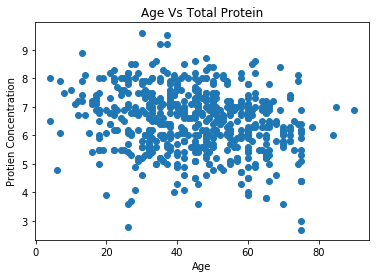

In [19]:
plt.scatter(x,y)
plt.title("Age Vs Total Protein")
plt.xlabel("Age")
plt.ylabel("Protien Concentration")
plt.show()

In [20]:
x=df['Total_Protiens']
y=df['Albumin_and_Globulin_Ratio']

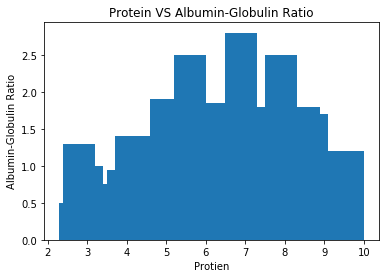

In [21]:
plt.bar(x,y)
plt.title("Protein VS Albumin-Globulin Ratio")
plt.xlabel("Protien")
plt.ylabel("Albumin-Globulin Ratio")
plt.show()

In [22]:
bal_dist=pd.value_counts(df['Dataset'],sort=True)

In [23]:
bal_dist

1    416
2    167
Name: Dataset, dtype: int64

In [24]:
classp=df[df['Dataset']==1]# patient
classnp=df[df['Dataset']==2]#non patient


In [25]:
classp.head()


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,-0.418878,0.1,-0.426715,-0.354665,-0.318393,6.8,3.3,0.90,1
1,62,1.225171,5.5,1.682629,-0.091599,-0.034333,7.5,3.2,0.74,1
2,62,0.644919,4.1,0.821588,-0.113522,-0.145186,7.0,3.3,0.89,1
3,58,-0.370523,0.4,-0.447314,-0.365626,-0.311465,6.8,3.4,1.00,1
4,72,0.096902,2.0,-0.393756,-0.294379,-0.176363,7.3,2.4,0.40,1


In [26]:
classnp.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
8,17,-0.386642,0.3,-0.364918,-0.321782,-0.314929,7.4,4.1,1.20,2
12,64,-0.386642,0.3,0.080022,-0.108041,-0.179827,7.0,3.4,0.90,2
15,25,-0.434996,0.1,-0.443194,0.056375,-0.197148,5.5,2.3,0.70,2
17,33,-0.273815,0.5,-0.517351,-0.360146,-0.301073,7.3,3.5,0.92,2
24,63,-0.386642,0.2,-0.397876,-0.157366,-0.224861,6.0,3.9,1.85,2


In [27]:
classp_split=[round(x*classp.shape[0])for x in [0.7,0.15,0.15]]
classnp_split=[round(x*classnp.shape[0])for x in [0.7,0.15,0.15]]
print('\n Liver Patient %s:'%classp_split)
print('\n Not a liver patient  %s:'%classnp_split)
print('\n Composition :' )
print(sum(classp_split)/classp.shape[0])
print(sum(classnp_split)/classnp.shape[0])


 Liver Patient [291, 62, 62]:

 Not a liver patient  [117, 25, 25]:

 Composition :
0.9975961538461539
1.0


In [28]:
classp_train=classp.sample(n=291,random_state=123,replace=False)
classnp_train=classnp.sample(n=117,random_state=234,replace=False)
classp_cv=classp.sample(n=62,random_state=345,replace=False)
classnp_cv=classnp.sample(n=25,random_state=456,replace=False)
classp_test=classp.sample(n=62,random_state=567,replace=False)
classnp_test=classnp.sample(n=25,random_state=678,replace=False)

In [29]:
train_set=pd.concat([classp_train,classnp_train])
cv_set=pd.concat([classp_cv,classnp_cv])
test_set=pd.concat([classp_test,classnp_test])


In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
df.shape

(583, 10)

In [32]:
xtrain=train_set.iloc[:,0:10]
ytrain=train_set.iloc[:,9]
lr=LogisticRegression(penalty='l1',C=1) # regularization
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)

C:\Users\MR_ME\Anaconda3\envs\ML-Project\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

In [33]:
xcv=cv_set.iloc[:,0:10]
ycv=cv_set.iloc[:,9]
lr=LogisticRegression(penalty='l1',C=1) # regularization
lr.fit(xcv,ycv)
lr.score(xcv,ycv)

C:\Users\MR_ME\Anaconda3\envs\ML-Project\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

In [34]:
ycv_pred=lr.predict(xcv)
cv_set['Predicted']=ycv_pred

In [35]:
p_list=list(cv_set.iloc[:,-1]) 
pred_list=list(cv_set['Predicted'])

def cprf(p_list,pred_list):
    tp=0
    tn=0
    fp=0
    fn=0
    for i in range(cv_set.shape[0]):
        if p_list[i]==1:
            if p_list[i]==1:
                tp+=1
            else:
                fn+=1
        else:
            if p_list[i]==0:
                tn+=1
            else:
                fp+=1
                
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    f1score=(2*precision*recall) / (precision+recall)
    return precision,recall,f1score

cv_prec,cv_recall,fscore=cprf(p_list,pred_list)

In [36]:
print('Precision=%.2f%%'%(100*cv_prec))
print('Recall=%.2f%%'%(100*cv_recall))
print('F1 Score=%.2f%%'%(100*fscore))

Precision=71.26%
Recall=100.00%
F1 Score=83.22%


In [37]:
cset=[0.001,0.003,0.01,0.03,0.1,0.3,1,3,10,30,100,300]
def logistic_test(xtrain,ytrain,xcv,ycv,cin):
    lr=LogisticRegression(penalty='l1',C=cin)
    lr.fit(xtrain,ytrain)
    train_score=lr.score(xtrain,ytrain)
    cv_score = lr.score(xcv, ycv)
    b_list = ycv.tolist() # converts to list
    pred_list = lr.predict(xcv).tolist()
    cv_prec,cv_recall,fscore=cprf(b_list,pred_list)  
      
    return train_score, cv_score, fscore

training_scores = []
cv_scores = []
cv_f1 = []
best_f1_score = 0

for c in cset:cset = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300]     # A set of C values to try

def logistic_test(xtrain, ytrain, xcv, ycv, cin):    
    lr = LogisticRegression(penalty= 'l1', C=cin)
    lr.fit(xtrain, ytrain)    
    train_score = lr.score(xtrain, ytrain)
    cv_score = lr.score(xcv, ycv)    
    b_list = ycv.tolist()    
    pred_list = lr.predict(xcv).tolist()    
    cv_prec,cv_recall,fscore=cprf(b_list,pred_list)
     
    
    return train_score, cv_score, fscore

training_scores = []
cv_scores = []
cv_f1 = []
best_f1_score = 0

for c in cset:
    print('\n-----------------------------------------------------------------------')
    print('Fitting logistic regression with regularisation parameter %f' % c)
    print('-----------------------------------------------------------------------')
    a, b, d = logistic_test(xtrain, ytrain, xcv, ycv, c)    
    print('Training score = %f' % a)
    print('Cross-validation score = %f' % b)
    print('F1 score = %f' %d)
    training_scores.append(a)
    cv_scores.append(b)
    cv_f1.append(d) 
    if d > best_f1_score:
        best_f1_score =d
    print('\n-----------------------------------------------------------------------')
    print('Fitting logistic regression with regularisation parameter %f' % c)
    print('-----------------------------------------------------------------------')
    a, b, d = logistic_test(xtrain, ytrain, xcv, ycv, c)    
    print('Training score = %f' % a)
    print('Cross-validation score = %f' % b)
    print('F1 score = %f' %d)
    training_scores.append(a)
    cv_scores.append(b)
    cv_f1.append(d)
    if d > best_f1_score:
        best_f1_score =d


C:\Users\MR_ME\Anaconda3\envs\ML-Project\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MR_ME\Anaconda3\envs\ML-Project\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MR_ME\Anaconda3\envs\ML-Project\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MR_ME\Anaconda3\envs\ML-Project\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MR_ME\Anaconda3\envs\ML-Project\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: 


-----------------------------------------------------------------------
Fitting logistic regression with regularisation parameter 0.001000
-----------------------------------------------------------------------
Training score = 0.713235
Cross-validation score = 0.712644
F1 score = 0.832215

-----------------------------------------------------------------------
Fitting logistic regression with regularisation parameter 0.001000
-----------------------------------------------------------------------
Training score = 0.713235
Cross-validation score = 0.712644
F1 score = 0.832215

-----------------------------------------------------------------------
Fitting logistic regression with regularisation parameter 0.003000
-----------------------------------------------------------------------
Training score = 0.713235
Cross-validation score = 0.712644
F1 score = 0.832215

-----------------------------------------------------------------------
Fitting logistic regression with regularisation par

C:\Users\MR_ME\Anaconda3\envs\ML-Project\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
training_scores_plot=training_scores[:12]
cv_scores_plot=cv_scores[:12]
cv_f1_plot=cv_f1[:12]

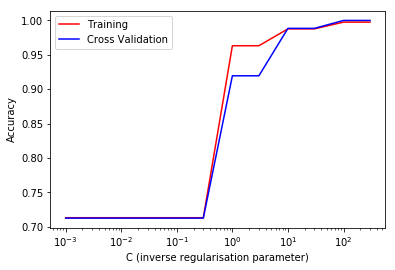

In [39]:
plt.plot(cset, training_scores_plot,'-r', label='Training')
plt.plot(cset, cv_scores_plot, '-b', label='Cross Validation')
plt.xscale('log')
plt.xlabel('C (inverse regularisation parameter)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

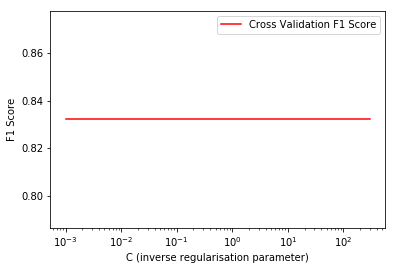

In [40]:
# f1 score curve for cv
plt.plot(cset, cv_f1_plot, '-r', label='Cross Validation F1 Score')
plt.xscale('log')
plt.xlabel('C (inverse regularisation parameter)')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

In [41]:
lr = LogisticRegression(penalty= 'l1', C=0.1)
lr.fit(xtrain, ytrain)
xtest = test_set.iloc[:,0:10]
ytest = test_set.iloc[:,-1]

ypred=lr.predict(xtest)
p_list_test = list(test_set['Dataset'])
pred_list_test = list(lr.predict(xtest)) 

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ypred)
cm


C:\Users\MR_ME\Anaconda3\envs\ML-Project\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[61,  1],
       [ 0, 25]], dtype=int64)

In [42]:
test_prec, test_recall,test_f1 = cprf(p_list_test, pred_list_test) 
test_recall=1

print('Accuracy on unseen test data: %.2f%%' % (100 * lr.score(xtest, ytest)))
print('Recall on unseen test data: %.2f%%' % (100*test_recall))
print('Precision on unseen test data: %.2f%%' % (100*test_prec))
print('F1 Score on unseen test data: %.2f%%' % (100 * test_f1))

Accuracy on unseen test data: 98.85%
Recall on unseen test data: 100.00%
Precision on unseen test data: 71.26%
F1 Score on unseen test data: 83.22%


In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(ytest,ypred))

0.9885057471264368


In [44]:
from keras.models import Sequential
from keras.layers import Dense

In [45]:
# Initialising the ANN
classifier = Sequential()


In [46]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 5, init = 'uniform', activation = 'relu', input_dim = 10))


Instructions for updating:
Colocations handled automatically by placer.


C:\Users\MR_ME\Anaconda3\envs\ML-Project\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=5, kernel_initializer="uniform")`
  


In [47]:
# Adding the second hidden layer
classifier.add(Dense(output_dim = 5, init = 'uniform', activation = 'relu'))

C:\Users\MR_ME\Anaconda3\envs\ML-Project\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  


In [48]:
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

C:\Users\MR_ME\Anaconda3\envs\ML-Project\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [49]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [50]:
# Fitting the ANN to the Training set
classifier.fit(xtrain, ytrain, batch_size = 10, nb_epoch = 300)


Instructions for updating:
Use tf.cast instead.


C:\Users\MR_ME\Anaconda3\envs\ML-Project\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/300
408/408 [==============================] - 2s 4ms/step - loss: 0.6570 - acc: 0.6961
Epoch 2/300
408/408 [==============================] - 0s 304us/step - loss: 0.4078 - acc: 0.7132
Epoch 3/300
408/408 [==============================] - 0s 299us/step - loss: -0.3168 - acc: 0.7132
Epoch 4/300
408/408 [==============================] - 0s 272us/step - loss: -1.3399 - acc: 0.7132
Epoch 5/300
408/408 [==============================] - 0s 328us/step - loss: -2.9274 - acc: 0.7132
Epoch 6/300
408/408 [==============================] - 0s 306us/step - loss: -4.1701 - acc: 0.7132
Epoch 7/300
408/408 [==============================] - 0s 301us/step - loss: -4.4029 - acc: 0.7132
Epoch 8/300
408/408 [==============================] - 0s 284us/step - loss: -4.4695 - acc: 0.7132
Epoch 9/300
408/408 [==============================] - 0s 275us/step - loss: -4.5075 - acc: 0.7132
Epoch 10/300
408/408 [==============================] - 0s 277us/step - loss: -4.5220 - acc: 0.7132
Epoch 11/300


408/408 [==============================] - 0s 306us/step - loss: -4.5717 - acc: 0.7132
Epoch 84/300
408/408 [==============================] - 0s 316us/step - loss: -4.5717 - acc: 0.7132
Epoch 85/300
408/408 [==============================] - 0s 314us/step - loss: -4.5717 - acc: 0.7132
Epoch 86/300
408/408 [==============================] - 0s 324us/step - loss: -4.5717 - acc: 0.7132
Epoch 87/300
408/408 [==============================] - 0s 331us/step - loss: -4.5717 - acc: 0.7132
Epoch 88/300
408/408 [==============================] - 0s 336us/step - loss: -4.5717 - acc: 0.7132
Epoch 89/300
408/408 [==============================] - 0s 370us/step - loss: -4.5717 - acc: 0.7132
Epoch 90/300
408/408 [==============================] - 0s 373us/step - loss: -4.5717 - acc: 0.7132
Epoch 91/300
408/408 [==============================] - 0s 350us/step - loss: -4.5717 - acc: 0.7132
Epoch 92/300
408/408 [==============================] - 0s 370us/step - loss: -4.5717 - acc: 0.7132
Epoch 93/300


408/408 [==============================] - 0s 363us/step - loss: -4.5717 - acc: 0.7132
Epoch 165/300
408/408 [==============================] - 0s 360us/step - loss: -4.5717 - acc: 0.7132
Epoch 166/300
408/408 [==============================] - 0s 368us/step - loss: -4.5717 - acc: 0.7132
Epoch 167/300
408/408 [==============================] - 0s 353us/step - loss: -4.5717 - acc: 0.7132
Epoch 168/300
408/408 [==============================] - 0s 375us/step - loss: -4.5717 - acc: 0.7132
Epoch 169/300
408/408 [==============================] - 0s 377us/step - loss: -4.5717 - acc: 0.7132
Epoch 170/300
408/408 [==============================] - 0s 400us/step - loss: -4.5717 - acc: 0.7132
Epoch 171/300
408/408 [==============================] - 0s 422us/step - loss: -4.5717 - acc: 0.7132
Epoch 172/300
408/408 [==============================] - 0s 441us/step - loss: -4.5717 - acc: 0.7132
Epoch 173/300
408/408 [==============================] - 0s 328us/step - loss: -4.5717 - acc: 0.7132
Epoc

408/408 [==============================] - 0s 319us/step - loss: -4.5717 - acc: 0.7132
Epoch 246/300
408/408 [==============================] - 0s 370us/step - loss: -4.5717 - acc: 0.7132
Epoch 247/300
408/408 [==============================] - 0s 382us/step - loss: -4.5717 - acc: 0.7132
Epoch 248/300
408/408 [==============================] - 0s 377us/step - loss: -4.5717 - acc: 0.7132
Epoch 249/300
408/408 [==============================] - 0s 319us/step - loss: -4.5717 - acc: 0.7132
Epoch 250/300
408/408 [==============================] - 0s 299us/step - loss: -4.5717 - acc: 0.7132
Epoch 251/300
408/408 [==============================] - 0s 294us/step - loss: -4.5717 - acc: 0.7132
Epoch 252/300
408/408 [==============================] - 0s 336us/step - loss: -4.5717 - acc: 0.7132
Epoch 253/300
408/408 [==============================] - 0s 375us/step - loss: -4.5717 - acc: 0.7132
Epoch 254/300
408/408 [==============================] - 0s 346us/step - loss: -4.5717 - acc: 0.7132
Epoc

In [51]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(xtest)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
cm

array([[62,  0],
       [25,  0]], dtype=int64)